# EDA for Lin Regression Project

In [86]:
import os
import math
import numpy as np
import pandas as pd
from os import listdir
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy
import time

In [87]:
df_train = pd.read_csv('/Users/jonathanbugg/Desktop/lin_reg_proj/data/2016_cleaned.csv')
df_train = df_train.loc[:,[i for i in df_train.columns if i != 'Unnamed: 0']]

df_test = pd.read_csv('/Users/jonathanbugg/Desktop/lin_reg_proj/data/2017_cleaned.csv')
df_test = df_test.loc[:,[i for i in df_train.columns if i != 'Unnamed: 0']]

TypeError: set() takes no keyword arguments

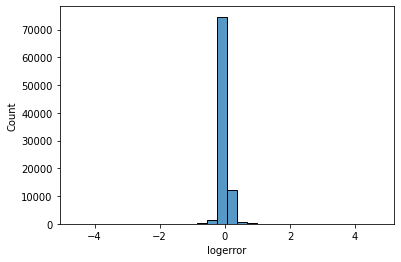

In [129]:
sns.histplot(df_train.logerror, bins = 30)
set(xlim=(-3,3))

In [93]:
np.random.seed(21)

target = 'logerror'
pid = 'parcelid'


def run_multiple_regression_ols(df, X_list, print_output = False):

    X = sm.add_constant(df.loc[:, X_list]) # Predictor Matrix: IV + Constant
    y = df.Y # Prediction Targets

    # Fit, summarize OLS regression
    model = sm.OLS(y, X)
    result = model.fit()
    
    if print_output == True:
        
        print(result.summary())
    
    return result

df_train['Y'] = np.abs(df_train.logerror)
training_cols = [i for i in df_train.columns if i not in [pid, target,'transactiondate','Y', 'parcelid', 'census_tract','censustractandblock']]

model_result = run_multiple_regression_ols(df_train, training_cols, False)



/Users/jonathanbugg/Desktop/crypto_portfolio_opt/venv/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [97]:
df_train_log_reg = df_train
df_train_log_reg['y_cut'] = df_train_log_reg.logerror.apply(lambda x : 1 if x>0 else 0)
df_train_log_reg[['y_cut', 'logerror']]

X_log_reg = df_train_log_reg[training_cols]
y_log_reg = df_train_log_reg['y_cut']

log_reg = sm.Logit(y_log_reg, X_log_reg).fit()

/Users/jonathanbugg/Desktop/crypto_portfolio_opt/venv/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning: overflow encountered in exp
  
/Users/jonathanbugg/Desktop/crypto_portfolio_opt/venv/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  A reference to the endogenous response variable


         Current function value: inf
         Iterations: 35


LinAlgError: Singular matrix

In [90]:
# Took this code from https://www.datasklr.com/ols-least-squares-regression/variable-selection 

def forward_regression(X, y,
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    initial_list = []
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add   with p-value '.format(best_feature, best_pval))

        if not changed:
            break

    return included

def backward_regression(X, 
                        y,
                        initial_list=[], 
                        threshold_in=0.01, 
                        threshold_out = 0.05, 
                        verbose=True):
    included=list(X.columns)
    i = 1
    while True:
        i += 1
        changed=False
        #print(X[included].dtypes)
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(worst_feature, '   ',str(worst_pval))
                #print('Drop  with p-value '.format(worst_feature, worst_pval))
        if not changed:
            break
        # if i > 20:
        #     break
    return included



In [109]:
backward_X = df_train[training_cols]
backward_x_cols = list(backward_X.columns)
backward_y = df_train['logerror']
backwards_test = backward_regression(backward_X, backward_y, verbose = True)

/Users/jonathanbugg/Desktop/crypto_portfolio_opt/venv/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


regionidcity_53571.0     0.9876652096661316
propertycountylandusecode_1310     0.976991231746621
roomcnt     0.9695418691384862
regionidcity_34780.0     0.960119345419375
regionidcity_45602.0     0.9274473162039376
buildingqualitytypeid     0.9270886515647832
regionidcity_10815.0     0.9225777851419985
regionidcity_15554.0     0.917018327590138
regionidcity_396054.0     0.9102457328951137
regionidcity_25459.0     0.8941039074346016
regionidcity_16764.0     0.8968354065163251
regionidcity_12292.0     0.8773386434284753
heatingorsystemtypeid_2.0     0.8577631521287539
heatingorsystemtypeid_11.0     0.8544554655076857
regionidcity_114828.0     0.8532000739715908
unitcnt     0.8520306835558549
regionidcity_33252.0     0.8507389877570224
regionidcity_18874.0     0.864449892512042
regionidcity_37086.0     0.8661868823407933
regionidcity_21412.0     0.877786372076534
regionidcity_29189.0     0.8511374270875675
regionidcity_10734.0     0.8579361499889866
regionidcity_39076.0     0.856502702384

In [110]:
X = sm.add_constant(df_train.loc[:, backwards_test]) # Predictor Matrix: IV + Constant
y = df_train.Y # Prediction Targets

# Fit, summarize OLS regression
backwards_model = sm.OLS(y, X)
backwards_model_result = backwards_model.fit()
backwards_model_result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     35.31
Date:                Sat, 09 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:17:53   Log-Likelihood:                 46820.
No. Observations:               89670   AIC:                        -9.349e+04
Df Residuals:                   89593   BIC:                        -9.276e+04
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
bedroomcnt                        -0.0082      0.001    -12.992      0.000      -0.009      -0.007
calculatedfinishedsquarefeet    7.146e-06   7.99e-07      8.939      0.000    5.58e-06    8.71e-06
hashottuborspa                    -0.0010      0.003     -0.305      0.760      -0.007       0.005
poolcnt                            0.0013      0.002      0.776      0.438      -0.002       0.005
assessmentyear                     0.0006   7.14e-05      8.674      0.000       0.000       0.001
landtaxvaluedollarcnt           9.235e-09   1.39e-09      6.636      0.000    6.51e-09     1.2e-08
heatingorsystemtypeid_24.0         0.0173      0.005      3.289      0.001       0.007       0.028
regionidcity_3491.0                0.2436      0.026      9.281      0.000       0.192       0.295
regionidcity_5534.0                0.0013      0.003      0.393      0.694      -0.005       0.008
regionidcity_6822.0                0.1336      0.029      4.549      0.000       0.076       0.191
regionidcity_10389.0               0.0337      0.010      3.500      0.000       0.015       0.053
regionidcity_14906.0               0.0907      0.040      2.275      0.023       0.013       0.169
regionidcity_16389.0               0.0706      0.024      2.946      0.003       0.024       0.118
regionidcity_17686.0               0.0235      0.008      3.107      0.002       0.009       0.038
regionidcity_18875.0               0.0236      0.019      1.217      0.224      -0.014       0.062
regionidcity_19177.0               0.0192      0.008      2.471      0.013       0.004       0.035
regionidcity_20008.0              -0.0061      0.005     -1.157      0.247      -0.016       0.004
regionidcity_21778.0               0.0340      0.020      1.672      0.095      -0.006       0.074
regionidcity_22827.0               0.0095      0.008      1.124      0.261      -0.007       0.026
regionidcity_25468.0               0.0356      0.028      1.286      0.199      -0.019       0.090
regionidcity_27183.0               0.0099      0.012      0.842      0.400      -0.013       0.033
regionidcity_29712.0               0.0088      0.011      0.794      0.427      -0.013       0.030
regionidcity_30267.0               0.0161      0.016      0.984      0.325      -0.016       0.048
regionidcity_31134.0               0.1661      0.041      4.005      0.000       0.085       0.247
regionidcity_33837.0               0.0116      0.009      1.316      0.188      -0.006       0.029
regionidcity_36502.0               0.0689      0.021      3.287      0.001       0.028       0.110
regionidcity_37015.0               0.0023      0.008      0.291      0.771      -0.013       0.017
regionidcity_38032.0               0.0033      0.006      0.566      0.572      -0.008       0.015
regionidcity_3

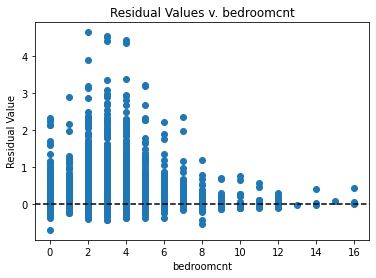

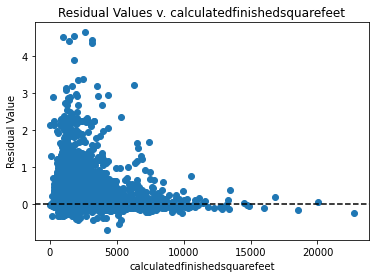

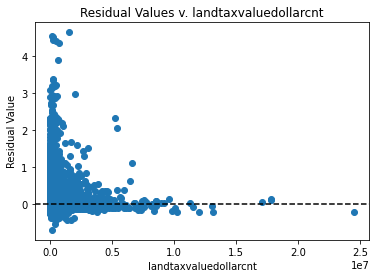

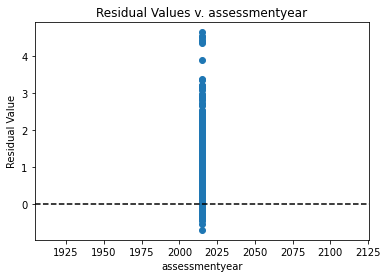

In [113]:
def plot_resid_pred(model, pred):
    resid = model.resid
    plt.scatter(pred, resid)
    plt.xlabel(pred.name)
    plt.ylabel('Residual Value')
    plt.title('Residual Values v. ' + pred.name)
    plt.axhline(color = 'black', linestyle = 'dashed')
    plt.show()

pred_columns = ['bedroomcnt', 'calculatedfinishedsquarefeet', 'landtaxvaluedollarcnt', 'assessmentyear']
for column in pred_columns:
    plot_resid_pred(backwards_model_result, X[column])


In [114]:
## Normal Probability Plot
resid_df = pd.DataFrame(backwards_model_result.resid, columns = ['resid'])
resid_df = resid_df.sort_values(by = 'resid').reset_index(drop = True).reset_index().rename({'index':'k'}, axis = 1)
resid_df.k = resid_df.k + 1
resid_df['expected_value'] = resid_df.apply(lambda x: np.sqrt(backwards_model_result.mse_resid) * scipy.stats.norm().ppf((x.k - .375)/(len(resid_df) + .25)), axis = 1)

resid_df

,k,resid,expected_value
0,1,-0.704093,-0.623965
1,2,-0.536974,-0.593146
2,3,-0.435280,-0.577117
3,4,-0.427665,-0.566098
4,5,-0.425770,-0.557651
...,...,...,...
89665,89666,4.432923,0.557651
89666,89667,4.441564,0.566098
89667,89668,4.538345,0.577117
89668,89669,4.551588,0.593146


Text(0.5, 1.0, 'Normal Probability Plot')

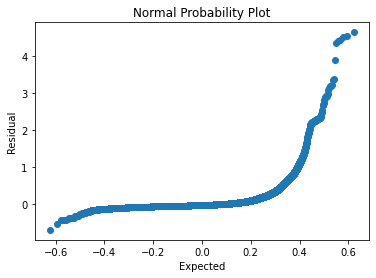

In [115]:
fig = plt.scatter(resid_df.expected_value, resid_df.resid)

plt.xlabel('Expected')
plt.ylabel('Residual')
plt.title('Normal Probability Plot')